In [2]:
from orphics import sehgal
import numpy as np
import os
import matplotlib.pyplot as plt
from pixell import enmap, curvedsky, utils, enplot
import healpy as hp
from cosmikyu import config, datasets
from cosmikyu import utils as cutils

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
data_dir = config.default_data_dir
sehgal_dir = os.path.join(data_dir, 'sehgal')
SDS_model = datasets.SehgalDataSet(sehgal_dir, data_type="modelv3", transforms=[], dummy_label=False)
data = np.zeros((5, 128, 128*len(SDS_model)))
compts = ["kappa", "ksz", "tsz", "ir_pts", "rad_pts"]

for i in range(len(SDS_model)):
    sidx = 128*i
    data[...,sidx: sidx+128] = SDS_model[i]

kappa


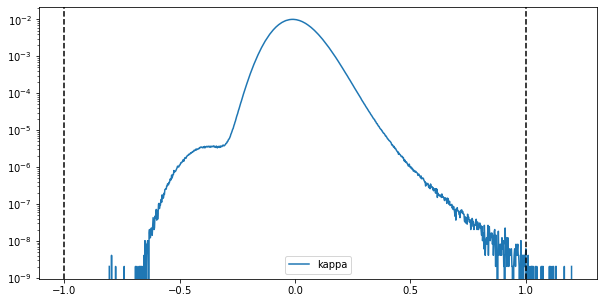

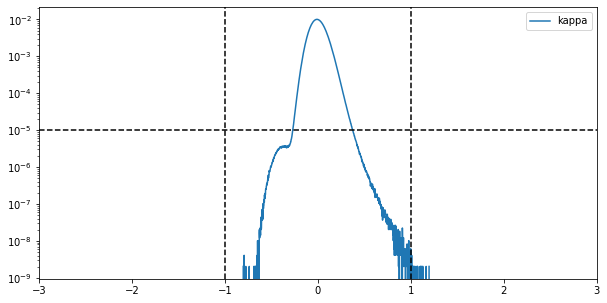

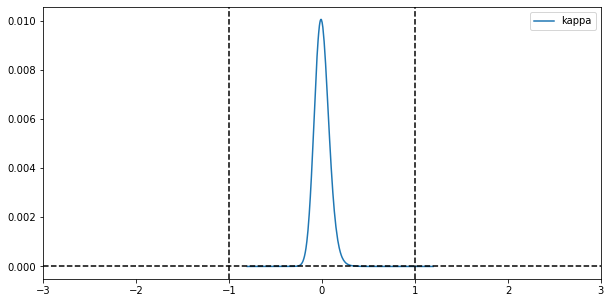

ksz


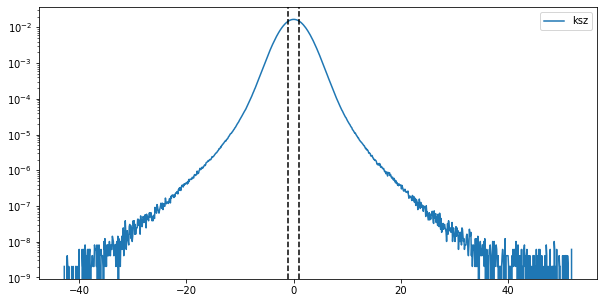

In [ ]:
zfact = 5

def power_normalize(emap, pos_pow, neg_pow):
    temp = emap.copy()
    loc = np.where(emap>=0)
    temp[loc] = temp[loc]**pos_pow
    loc = np.where(emap<0)
    temp[loc] = -1*np.abs(temp[loc])**neg_pow
    return temp

def log_normalize(emap, pos=True, neg=True):
    temp = emap.copy()
    if pos:
        loc = np.where(emap>=0)
        temp[loc] = np.log(temp[loc])
    if neg:
        loc = np.where(emap<0)
        temp[loc] = -1*np.log(np.abs(temp[loc]))
    return temp

def mean_normalize(emap):
    temp = emap.copy()
    temp = temp - np.mean(temp)
    return temp

def minmax_normalize(emap):
    mean = np.mean(emap)
    #emap = emap - mean
    max_val, min_val = emap.max(), emap.min()
    return (emap-mean)/(max_val-min_val)*2, (min_val, max_val, mean)

def z_normalize(emap, zfact = zfact):
    mean, std = emap.mean(), emap.std()
    
    return (emap-mean)/(std*zfact), (mean, std)

freq_idx = 148



#ns = {"kappa":  lambda x: z_normalize(x),
#      "ksz": lambda x: z_normalize(x),
#      "ir_pts": lambda x: z_normalize(log_normalize(x)),
#      "rad_pts": lambda x: z_normalize(log_normalize(x)),
#      "tsz": lambda x: z_normalize(log_normalize(x)),
#     }    
ns = {"kappa": z_normalize,
      "ksz": z_normalize,
      "ir_pts": lambda x: z_normalize(power_normalize(x, 0.4, 0.5)),
      "rad_pts": lambda x: z_normalize(power_normalize(x, 0.3, 0.4)),
      "tsz": lambda x: z_normalize(power_normalize(x, 1, 0.02)),
     }

ns = {"kappa": minmax_normalize,
      "ksz": minmax_normalize,
      "ir_pts": lambda x: minmax_normalize(power_normalize(x, 0.4, 0.5)),
      "rad_pts": lambda x: minmax_normalize(power_normalize(x, 0.3, 0.4)),
      "tsz": lambda x: minmax_normalize(power_normalize(x, 1, 0.02)),
     }

ns = {"kappa": minmax_normalize,
      "ksz": minmax_normalize,
      "ir_pts": lambda x: minmax_normalize(log_normalize(x)),
      "rad_pts": lambda x: minmax_normalize(log_normalize(x)),
      "tsz": lambda x: minmax_normalize(log_normalize(x)),
     }

norm_info_model = {}
hist_org_model = {}
hist_norm_model = {}
compts = ["kappa", "ksz", "tsz", "ir_pts", "rad_pts"]
for i, compt_idx in enumerate(compts):
    print(compt_idx)
    #if i !=3: continue


    hist, bins = np.histogram(data[i].copy(), bins=1024)
    fig = plt.figure(figsize=(10, 5))
    hist_org_model[compt_idx] = (hist, bins)
    bin_center = (bins[:-1]+bins[1:])/2.
    plt.plot(bin_center, hist/np.sum(hist), label=compt_idx)
    plt.legend()
    plt.axvline(x=1, ls="--", color="k")
    plt.axvline(x=-1, ls="--", color="k")
    plt.yscale("log")
    plt.show()
    
    ndata, norm_info_model[compt_idx] = ns[compt_idx](data[i].copy())
    hist, bins = np.histogram(ndata, bins=1024)
    fig = plt.figure(figsize=(10, 5))
    hist_norm_model[compt_idx] = (hist, bins)
    bin_center = (bins[:-1]+bins[1:])/2.
    plt.plot(bin_center, hist/np.sum(hist), label=compt_idx)
    plt.axvline(x=1, ls="--", color="k")
    plt.axvline(x=-1, ls="--", color="k")
    plt.axhline(y=1e-5, ls="--", color="k")
    plt.legend()
    plt.xlim(-3,3)
    
    plt.yscale("log")
    plt.show()
    
    hist, bins = np.histogram(ndata, bins=1024)
    fig = plt.figure(figsize=(10, 5))
    plt.plot(bin_center, hist/np.sum(hist), label=compt_idx)
    plt.axvline(x=1, ls="--", color="k")
    plt.axvline(x=-1, ls="--", color="k")
    plt.axhline(y=1e-5, ls="--", color="k")
    plt.legend()
    plt.xlim(-3,3)
    
    #plt.yscale("log")
    plt.show()


In [8]:
norm_info_model

{'kappa': (-0.8058684461662012, 1.1995424355853044, -2.6322709341968308e-05),
 'ksz': (-42.80890881788809, 51.817590232871254, -0.004066327476039634),
 'tsz': (-11.020927470135442, 14.722275554742817, -0.8043032523357773),
 'ir_pts': (-15.168500981873311, 9.923098986061506, 2.6918922386164366),
 'rad_pts': (-18.673701097850845, 20.101590121459612, 0.02864350000648169)}

In [22]:
data_dir = "/home/dwhan89/workspace/cosmikyu/data/sehgal"
def data_path(x):
    return os.path.join(data_dir, x)


print(cutils.load_data(data_path("normalization_info_fullv3.npz")))


{'kappa': {'mean': 0.0006336332067061694, 'std': 0.08172548330795769, 'pow_neg': 1.0, 'pow_pos': 1.0}, 'ir_pts': {'mean': 5.721023946021173, 'std': 1.9341009335791377, 'pow_neg': 1.0, 'pow_pos': 0.7}, 'ksz': {'mean': 0.0002993681680640703, 'std': 2.3529662257086166, 'pow_neg': 1.0, 'pow_pos': 1.0}, 'rad_pts': {'mean': 0.1133571365285613, 'std': 1.8965969758851435, 'pow_neg': 1.0, 'pow_pos': 0.7}, 'tsz': {'mean': -1.185551061621256, 'std': 0.14243788354029194, 'pow_neg': 0.2, 'pow_pos': 1.0}}


In [ ]:
sehgal_dir = "/home/dwhan89/scratch/data/sehgal_et_al_sims/cosmo_sim_maps/July2009/inputs/microwaveSky_20mjy"
SEHGAL10 = sehgal.SehgalSky2010(path=sehgal_dir, data_type='alm')

hists_org = {}
hists_norm = {}
norm_info = {}
zfact = 4

def power_normalize(emap, pos_pow, neg_pow):
    temp = emap.copy()
    loc = np.where(emap>=0)
    temp[loc] = temp[loc]**pos_pow
    loc = np.where(emap<0)
    temp[loc] = -1*np.abs(temp[loc])**neg_pow
    return temp

def log_normalize(emap, pos=True, neg=True):
    temp = emap.copy()
    if pos:
        loc = np.where(emap>=0)
        temp[loc] = np.log(temp[loc])
    if neg:
        loc = np.where(emap<0)
        temp[loc] = -1*np.log(np.abs(temp[loc]))
    return temp

def mean_normalize(emap):
    temp = emap.copy()
    temp = temp - np.mean(temp)
    return temp

def minmax_normalize(emap):
    max_val, min_val = emap.max(), emap.min()
    return (emap)/(max_val-min_val)

def z_normalize(emap, zfact = zfact):
    mean, std = emap.mean(), emap.std()
    
    return (emap-mean)/(std*zfact), (mean, std)

rfs = {"kappa": SEHGAL10.get_kappa,
       "ksz": SEHGAL10.get_ksz,
       "tsz": SEHGAL10.get_tsz,
       "rad_pts": SEHGAL10.get_radio,
       "ir_pts": SEHGAL10.get_cib
      }

freq_idx = 148



#ns = {"kappa":  lambda x: z_normalize(x),
#      "ksz": lambda x: z_normalize(x),
#      "ir_pts": lambda x: z_normalize(log_normalize(x)),
#      "rad_pts": lambda x: z_normalize(log_normalize(x)),
#      "tsz": lambda x: z_normalize(log_normalize(x)),
#     }
ns = {"kappa": z_normalize,
      "ksz": z_normalize,
      "ir_pts": lambda x: z_normalize(power_normalize(x, 0.6, 1)),
      "rad_pts": lambda x: z_normalize(power_normalize(x, 0.7, 1)),
      "tsz": lambda x: z_normalize(power_normalize(x, 1, 0.1)),
     }


shape, wcs = enmap.fullsky_geometry(res=0.5*utils.arcmin)
ycent = shape[0] // 2
ydelta = int(10*utils.degree/(0.5*utils.arcmin))
ymin, ymax = ycent-ydelta, ycent+ydelta
print(shape, ycent, ydelta, ymin, ymax)

template = enmap.zeros(shape, wcs)
template = template[ymin:ymax,:].copy()
nshape, nwcs = template.shape, template.wcs

for compt_idx in ['kappa']:
    #continue
    print(compt_idx)
    alm = rfs[compt_idx]()
    emap = curvedsky.alm2map(alm, enmap.zeros(nshape, nwcs))

    hist, bins = np.histogram(emap.flatten(), bins=1024)
    fig = plt.figure(figsize=(10, 5))
    hists_org[compt_idx] = (hist, bins)
    bin_center = (bins[:-1]+bins[1:])/2.
    plt.plot(bin_center, hist/np.sum(hist), label=compt_idx)
    plt.legend()
    plt.yscale("log")
    plt.show()
    
    emap, norm_info[compt_idx] = ns[compt_idx](emap)
    hist, bins = np.histogram(emap.flatten(), bins=1024)
    fig = plt.figure(figsize=(10, 5))
    hists_norm[compt_idx] = (hist, bins)
    bin_center = (bins[:-1]+bins[1:])/2.
    plt.plot(bin_center, hist/np.sum(hist), label=compt_idx)
    plt.axvline(x=1, ls="--", color="k")
    plt.axvline(x=-1, ls="--", color="k")
    plt.legend()
    plt.xlim(-3,3)
    plt.yscale("log")
    plt.show()

for compt_idx in ['ir_pts', "ksz", "rad_pts", "tsz"]:
    print(compt_idx)
    alm = rfs[compt_idx](148)
    emap = curvedsky.alm2map(alm, enmap.zeros(nshape, nwcs))

    hist, bins = np.histogram(emap.flatten(), bins=1024)
    fig = plt.figure(figsize=(10, 5))
    hists_org[compt_idx] = (hist, bins)
    bin_center = (bins[:-1]+bins[1:])/2.
    plt.plot(bin_center, hist/np.sum(hist), label=compt_idx)
    plt.legend()
    plt.yscale("log")
    plt.show()
    
    emap, norm_info[compt_idx] = ns[compt_idx](emap)
    hist, bins = np.histogram(emap.flatten(), bins=1024)
    fig = plt.figure(figsize=(10, 5))
    hists_norm[compt_idx] = (hist, bins)
    bin_center = (bins[:-1]+bins[1:])/2.
    #plt.xlim(-3,3)
    plt.plot(bin_center, hist/np.sum(hist), label=compt_idx)
    plt.axvline(x=1, ls="--", color="k")
    plt.axvline(x=-1, ls="--", color="k")
    plt.legend()
    plt.yscale("log")
    plt.show()



(21601, 43200) 10800 1200 9600 12000
kappa


In [12]:
norm_info_out = {} 
pows_facts = {"kappa": (1.,1.),
      "ksz": (1.,1.),
      "ir_pts": (1., 0.7),
      "rad_pts": (1., 0.7),
      "tsz": (0.2, 1.)
     }

for idx in norm_info.keys():
    norm_info_out[idx] = {"mean":float(norm_info[idx][0]), "std":float(norm_info[idx][1]),
                          "pow_neg": pows_facts[idx][0], "pow_pos": pows_facts[idx][1]}
    
hist_org_out = {} 
for idx in hists_org.keys():
    hist_org_out[idx] = {}
    hist_org_out[idx]["hist"] = hists_org[idx][0]
    bin_edges =  hists_org[idx][1]
    hist_org_out[idx]["bin_centers"] = (bin_edges[:-1]+bin_edges[1:])/2.
    hist_org_out[idx]["bin_edges"] = bin_edges
    
hist_norm_out = {} 
for idx in hists_norm.keys():
    hist_norm_out[idx] = {}
    hist_norm_out[idx]["hist"] = hists_norm[idx][0]
    bin_edges =  hists_norm[idx][1]
    hist_norm_out[idx]["bin_centers"] = (bin_edges[:-1]+bin_edges[1:])/2.
    hist_norm_out[idx]["bin_edges"] = bin_edges

In [13]:
data_dir = "/home/dwhan89/workspace/cosmikyu/data/sehgal"
def data_path(x):
    return os.path.join(data_dir, x)

def load_data(data_path):
    data = np.load(data_path, allow_pickle=True)    
    return {key:data[key].item() for key in data}

np.savez(data_path("original_histogram_fullv3.npz"), **hist_org_out)
np.savez(data_path("normalized_histogram_fullv3.npz"), **hist_norm_out)
np.savez(data_path("normalization_info_fullv3.npz"), **norm_info_out)




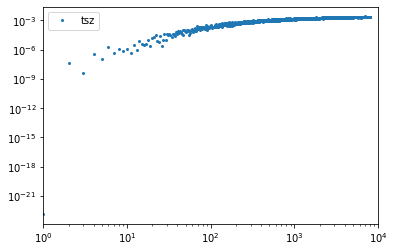

In [58]:
sehgal_dir = "/home/dwhan89/scratch/data/sehgal_et_al_sims/cosmo_sim_maps/July2009/inputs/microwaveSky"
spec_dir = "/home/dwhan89/scratch/data/sehgal_et_al_sims/cosmo_sim_maps/July2009/inputs/specs"

shape, wcs = enmap.fullsky_geometry(res=0.5*utils.arcmin)
template = enmap.zeros(shape, wcs)

fig = plt.figure()
freq_idx = 148
fgs = ["lensedcmb", "skymap"]
for fg_idx in fgs:
    alm_file = os.path.join(sehgal_dir, "148_%s_alm.fits"%fg_idx)
    enmap_file = os.path.join(sehgal_dir, "148_%s_enmap.fits"%fg_idx)
    spec_file = os.path.join(spec_dir, "148_%s_dls.npy"%fg_idx)
    alm = np.complex128(hp.read_alm(alm_file))
    fgmap = template.copy()
    fgmap = curvedsky.alm2map(alm, fgmap)
    cl = hp.alm2cl(alm)*sehgal.jysr2thermo(148)**2
    l = np.arange(len(cl))
    l_fact = l*(l+1)/(2*np.pi)
    plt.plot(l, l_fact*cl, label=fg_idx, ls="", marker="o"
            , markersize=2)
    specs = np.zeros((8000+1, 2))
    specs[:,0] = l
    specs[:,1] = l_fact*cl
    np.save(spec_file, specs)
    enmap.write_map(enmap_file, fgmap)
    
plt.legend()
plt.xlim(1, 1e4)
#plt.ylim(1e-2, 1e4)
plt.xscale("log")
plt.yscale("log")
plt.show()

fig = plt.figure()
freq_idx = 148
fgs = ['ir_pts', "ksz", "rad_pts", "tsz", "lensed"]
for fg_idx in fgs:
    alm_file = os.path.join(sehgal_dir, "148_%s_alm.fits"%fg_idx)
    enmap_file = os.path.join(sehgal_dir, "148_%s_enmap.fits"%fg_idx)
    spec_file = os.path.join(spec_dir, "148_%s_dls.npy"%fg_idx)
    alm = np.complex128(hp.read_alm(alm_file))
    fgmap = template.copy()
    fgmap = curvedsky.alm2map(alm, fgmap)
    cl = hp.alm2cl(alm)*sehgal.jysr2thermo(148)**2
    l = np.arange(len(cl))
    l_fact = l*(l+1)/(2*np.pi)
    plt.plot(l, l_fact*cl, label=fg_idx, ls="", marker="o"
            , markersize=2)
    specs = np.zeros((8000+1, 2))
    specs[:,0] = l
    specs[:,1] = l_fact*cl
    np.save(spec_file, specs)
    enmap.write_map(enmap_file, fgmap)
    
plt.legend()
plt.xlim(1, 1e4)
plt.ylim(1e-2, 1e4)
plt.xscale("log")
plt.yscale("log")
plt.show()

fig = plt.figure()

alm_file = os.path.join(sehgal_dir, "kappa_alm.fits")
enmap_file = os.path.join(sehgal_dir, "kappa_enmap.fits")
spec_file = os.path.join(spec_dir, "kappa_cls.npy")
alm = np.complex128(hp.read_alm(alm_file))
fgmap = template.copy()
fgmap = curvedsky.alm2map(alm, fgmap)
cl = hp.alm2cl(alm)
l = np.arange(len(cl))
plt.plot(l, l_fact*cl, label="kappa", ls="", marker="o"
        , markersize=2)
specs = np.zeros((8000+1, 2))
specs[:,0] = l
specs[:,1] = cl
np.save(spec_file, specs)
enmap.write_map(enmap_file, fgmap)
    
plt.legend()
plt.xlim(1, 1e4)
#plt.ylim(1e-2, 1e4)
plt.xscale("log")
plt.yscale("log")
plt.show()